### Importação dos dados



In [34]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [35]:
todas_lojas = pd.concat([loja, loja2, loja3, loja4])

todas_lojas

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66
2354,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86
2355,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79
2356,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55


In [36]:
faturamento_por_loja = todas_lojas.groupby("Local da compra")["Preço"].sum().reset_index()
faturamento_por_loja = faturamento_por_loja.sort_values("Preço", ascending=False)

print(faturamento_por_loja)


   Local da compra       Preço
25              SP  2419806.94
18              RJ   771412.90
10              MG   690814.92
22              RS   367611.78
17              PR   307757.16
23              SC   194401.69
4               BA   176053.80
6               DF   136502.84
8               GO   132492.61
15              PE   120764.28
7               ES   106834.71
5               CE    70799.98
11              MS    51329.96
12              MT    48582.84
13              PA    47176.43
9               MA    40949.76
19              RN    35846.21
14              PB    29506.37
16              PI    27864.05
1               AL    25823.67
26              TO    17778.47
20              RO    16423.52
24              SE    16323.63
2               AM     7848.60
21              RR     4197.79
3               AP     3781.44
0               AC     2804.44


# 2. Vendas por Categoria

In [37]:
# Agrupa por loja e categoria, contando quantos produtos foram vendidos
produtos_por_categoria = (
    todas_lojas
    .groupby(["Local da compra", "Categoria do Produto"])
    ["Produto"]
    .count()
    .reset_index()
    .rename(columns={"Produto": "Quantidade de Vendas"})
)

# Ordena por loja e depois pela categoria mais vendida
produtos_por_categoria = produtos_por_categoria.sort_values(
    ["Local da compra", "Quantidade de Vendas"],
    ascending=[True, False]
)

print(produtos_por_categoria)


    Local da compra   Categoria do Produto  Quantidade de Vendas
0                AC       eletrodomesticos                     1
1                AC            eletronicos                     1
2                AC        esporte e lazer                     1
5                AL            eletronicos                     9
6                AL        esporte e lazer                     8
..              ...                    ...                   ...
193              TO            eletronicos                     4
191              TO             brinquedos                     3
195              TO  instrumentos musicais                     3
196              TO                 livros                     1
198              TO  utilidades domesticas                     1

[199 rows x 3 columns]


In [38]:
mais_populares = produtos_por_categoria.groupby("Local da compra").head(1)
print(mais_populares)


    Local da compra   Categoria do Produto  Quantidade de Vendas
0                AC       eletrodomesticos                     1
5                AL            eletronicos                     9
17               AM                 moveis                     4
22               AP  instrumentos musicais                     3
30               BA                 moveis                    71
34               CE            eletronicos                    28
40               DF             brinquedos                    50
54               ES                 moveis                    37
62               GO                 moveis                    46
70               MA                 moveis                    17
73               MG            eletronicos                   219
81               MS            eletronicos                    14
93               MT                 moveis                    16
97               PA            eletronicos                    16
106              PB      

# 3. Média de Avaliação das Lojas


In [39]:
# Calcula a média das avaliações por loja
media_avaliacao = (
    todas_lojas
    .groupby("Local da compra")["Avaliação da compra"]
    .mean()
    .reset_index()
    .rename(columns={"Avaliação da compra": "Média de Avaliação"})
)

# Ordena da melhor para a pior média
media_avaliacao = media_avaliacao.sort_values("Média de Avaliação", ascending=False)

print(media_avaliacao)


   Local da compra  Média de Avaliação
19              RN            4.208333
25              SP            4.113619
12              MT            4.112500
11              MS            4.097561
10              MG            4.090744
14              PB            4.086957
17              PR            4.078224
2               AM            4.071429
6               DF            4.020661
22              RS            4.018727
7               ES            4.017544
23              SC            4.011561
15              PE            3.977901
8               GO            3.940860
20              RO            3.894737
26              TO            3.827586
4               BA            3.803226
16              PI            3.800000
3               AP            3.777778
18              RJ            3.777228
13              PA            3.691358
9               MA            3.677419
0               AC            3.666667
1               AL            3.634146
5               CE       

In [40]:
media_avaliacao["Média de Avaliação"] = media_avaliacao["Média de Avaliação"].round(2)

# 4. Produtos Mais e Menos Vendidos

In [41]:
# Agrupa por loja e produto e conta as vendas
vendas_produto = (
    todas_lojas
    .groupby(["Local da compra", "Produto"])
    .size()
    .reset_index(name="Quantidade de Vendas")
)

In [42]:
# Produto mais vendido por loja
mais_vendidos = (
    vendas_produto
    .sort_values(["Local da compra", "Quantidade de Vendas"], ascending=[True, False])
    .groupby("Local da compra")
    .head(1)
    .reset_index(drop=True)
)

# Produto menos vendido por loja
menos_vendidos = (
    vendas_produto
    .sort_values(["Local da compra", "Quantidade de Vendas"], ascending=[True, True])
    .groupby("Local da compra")
    .head(1)
    .reset_index(drop=True)
)

print("=== PRODUTOS MAIS VENDIDOS POR LOJA ===")
print(mais_vendidos)
print("\n=== PRODUTOS MENOS VENDIDOS POR LOJA ===")
print(menos_vendidos)


=== PRODUTOS MAIS VENDIDOS POR LOJA ===
   Local da compra                   Produto  Quantidade de Vendas
0               AC                 Bicicleta                     1
1               AL            Corda de pular                     3
2               AM        Secadora de roupas                     2
3               AP            Mesa de centro                     2
4               BA                  Cama box                    13
5               CE                  Faqueiro                     6
6               DF     Cadeira de escritório                     9
7               ES          Blocos de montar                     7
8               GO                 Cama king                     8
9               MA             Bola de vôlei                     4
10              MG               Boneca bebê                    31
11              MS                   Bateria                     5
12              MT          Bola de basquete                     5
13              PA    

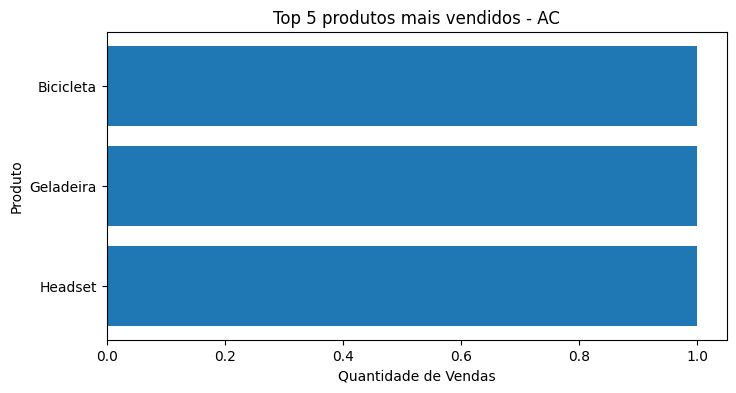

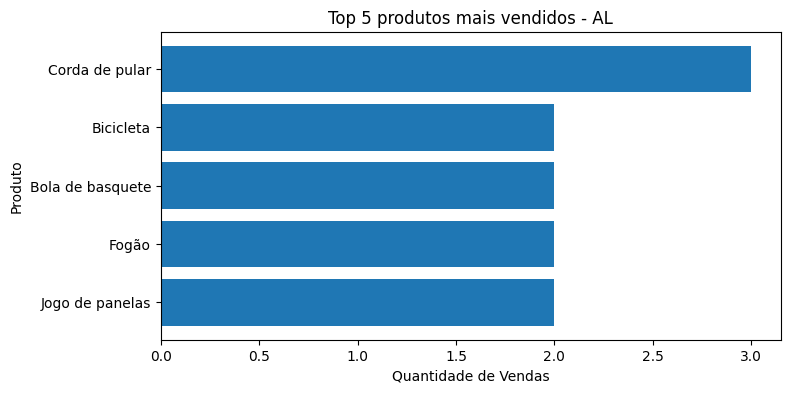

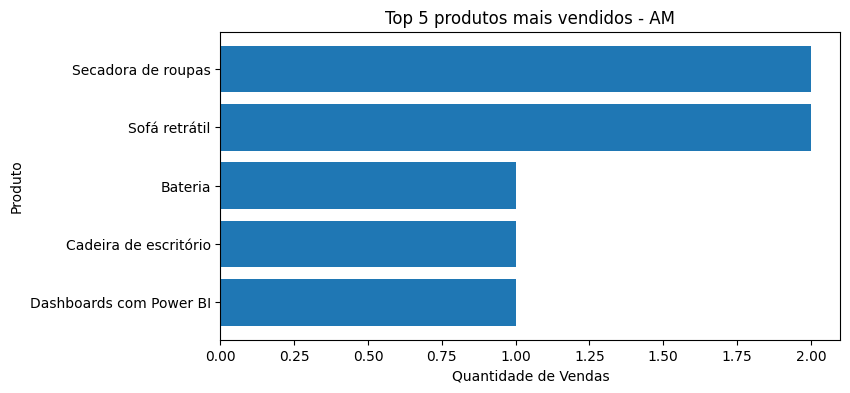

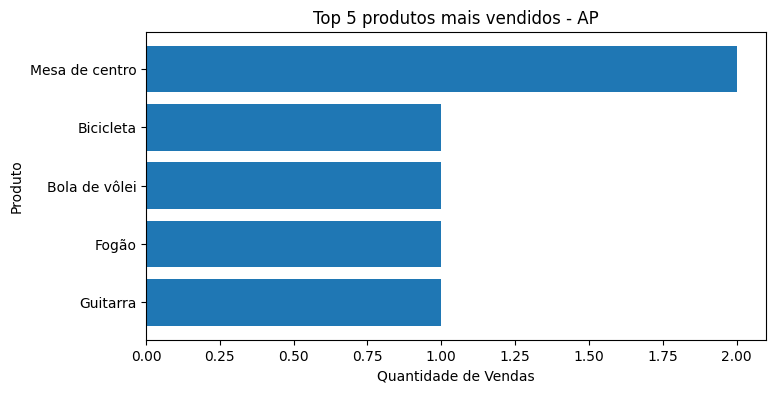

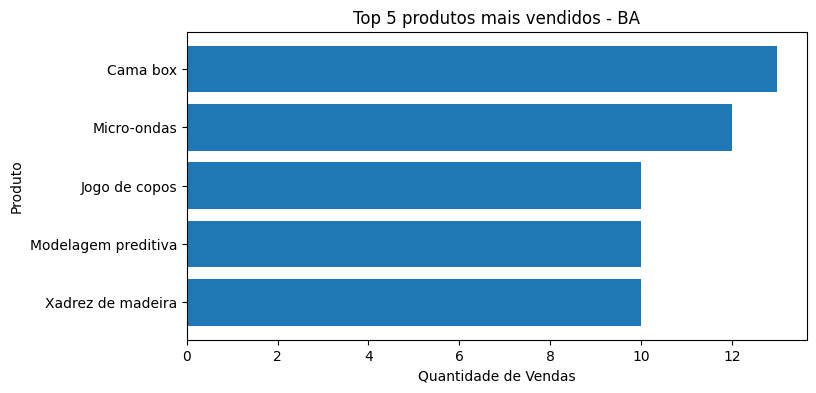

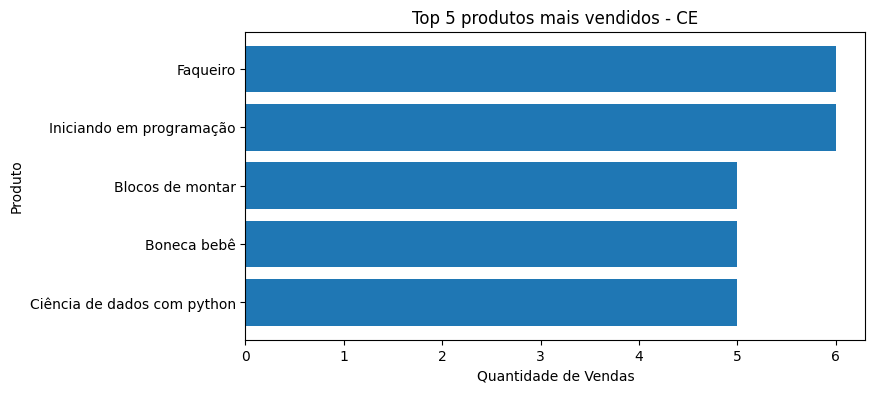

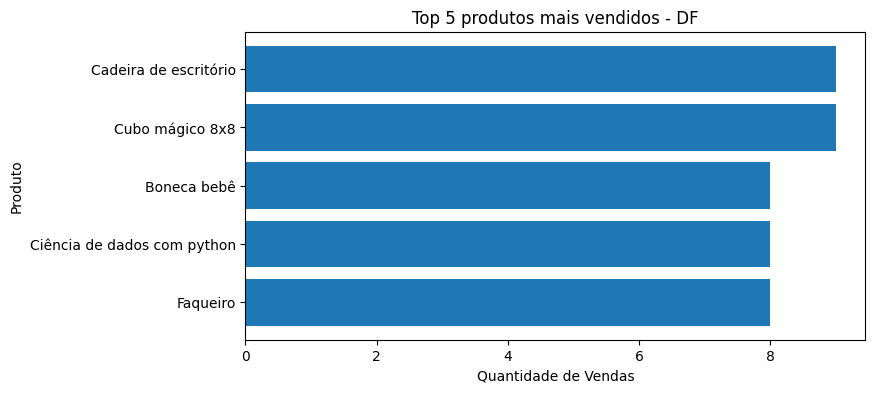

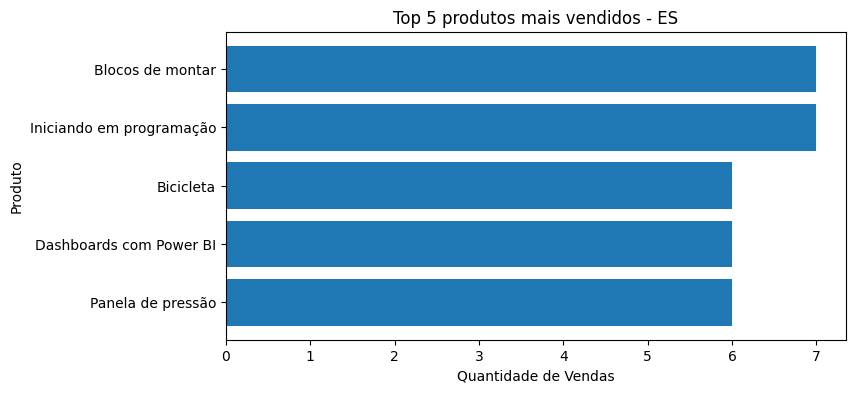

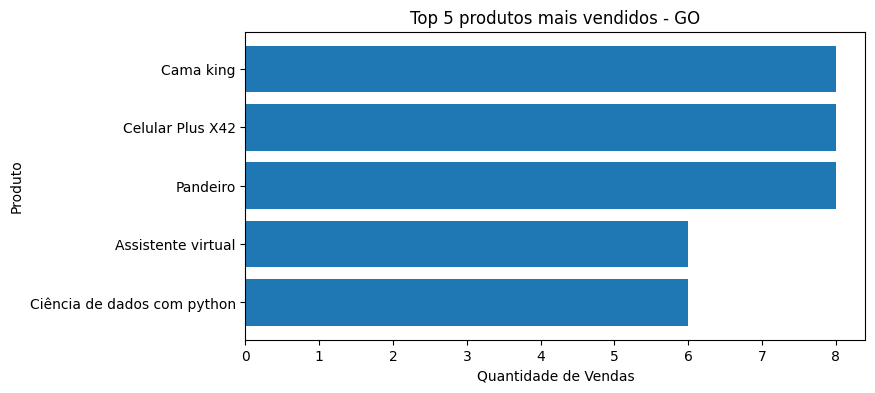

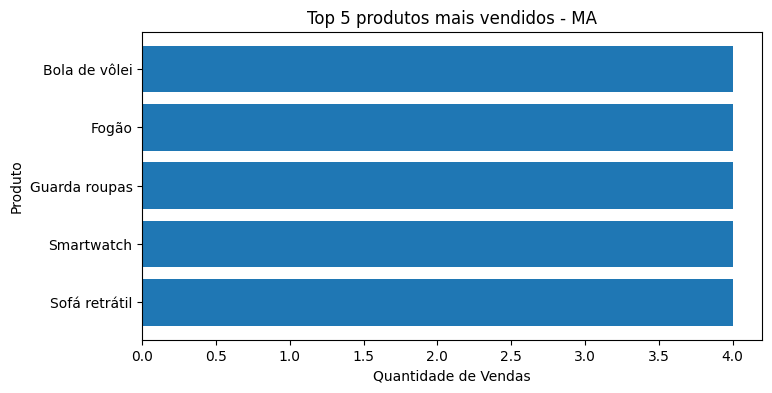

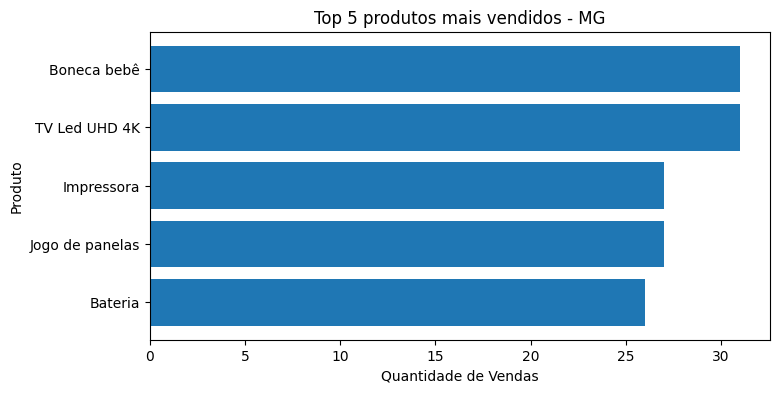

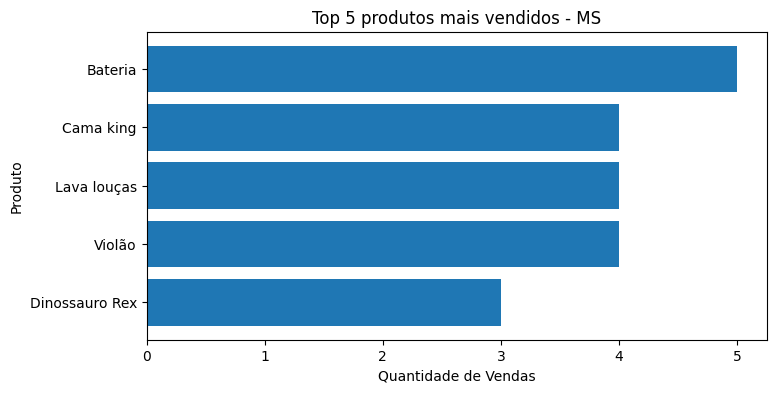

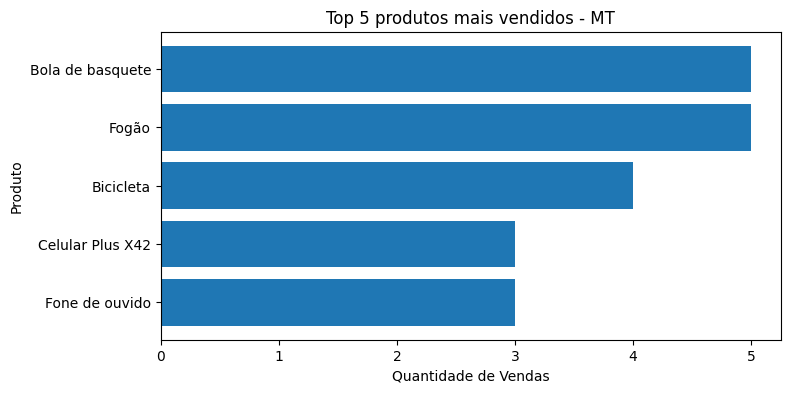

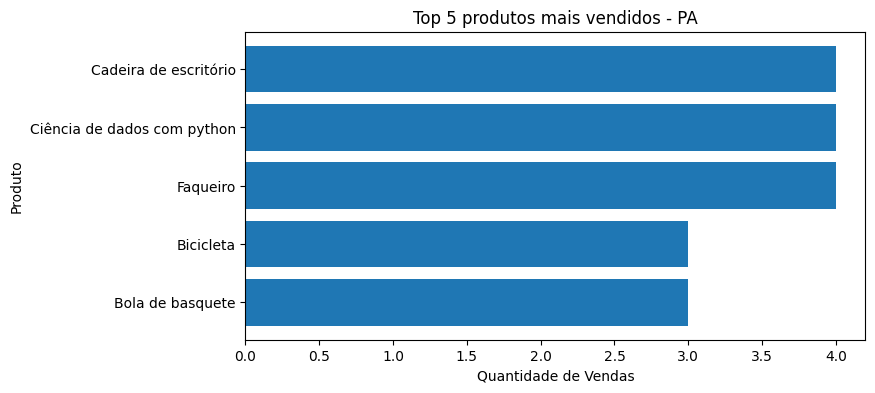

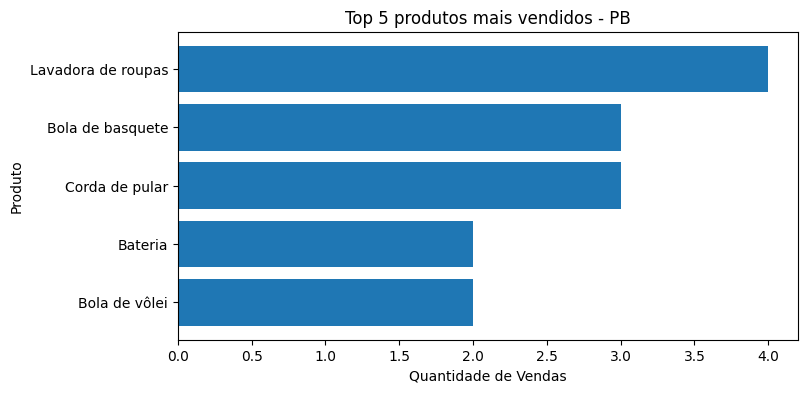

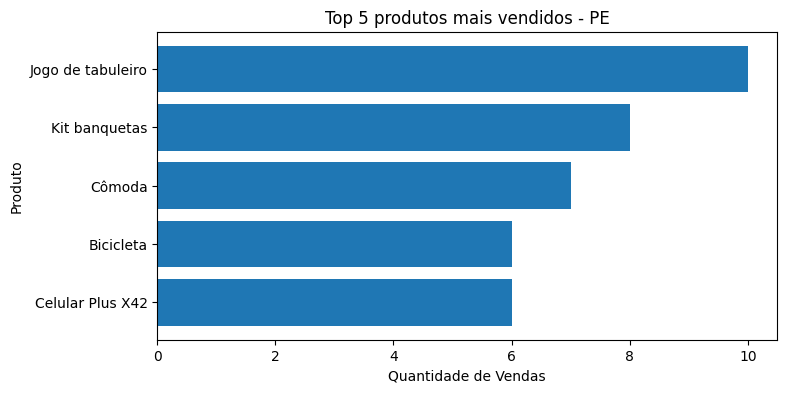

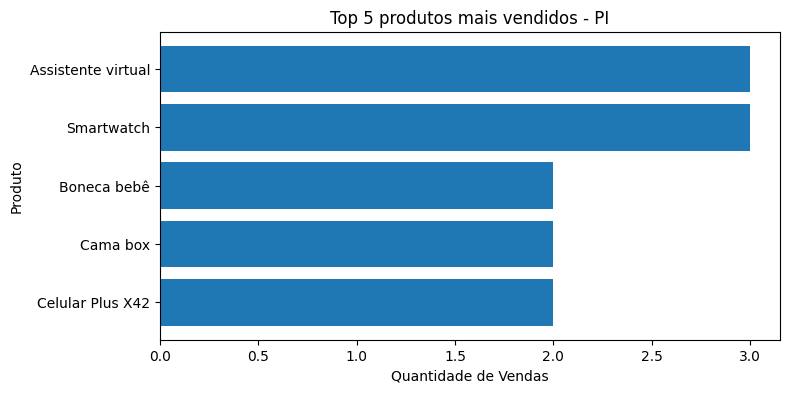

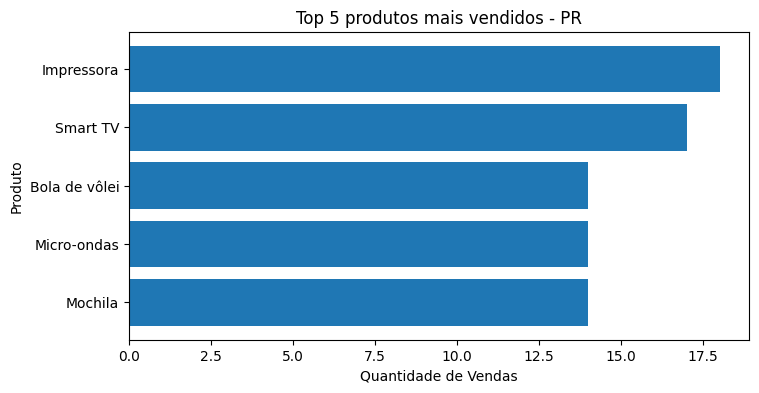

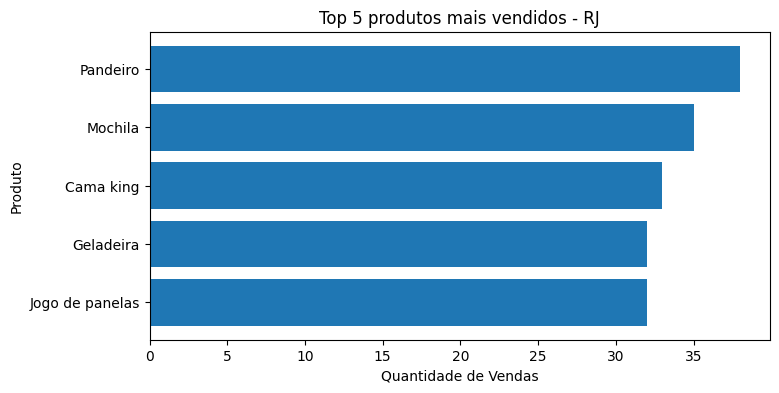

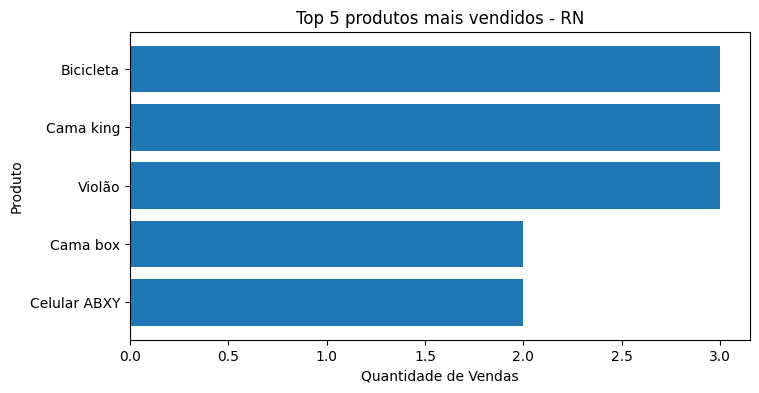

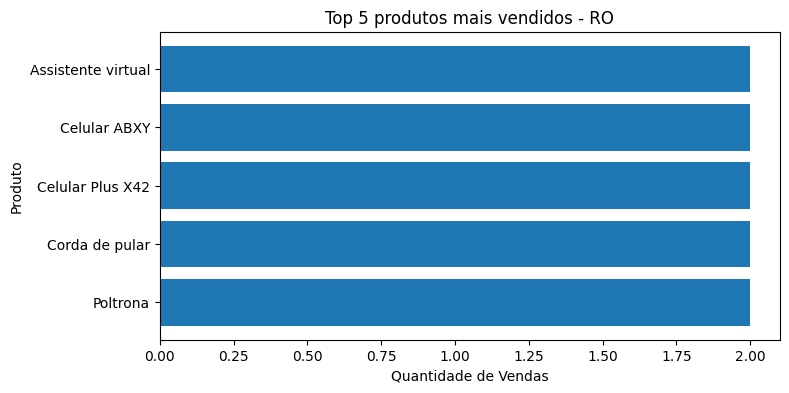

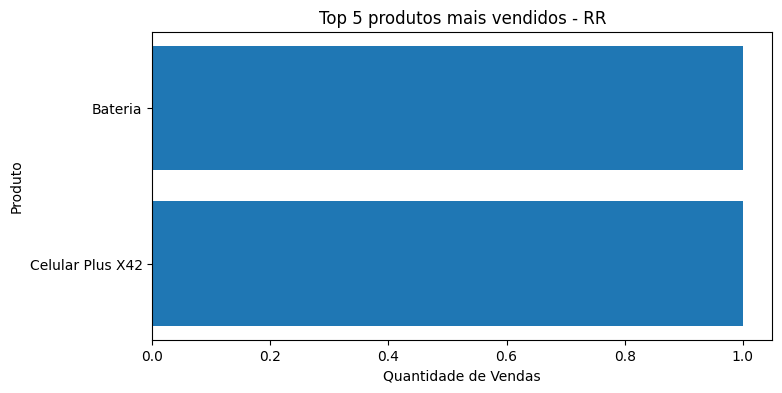

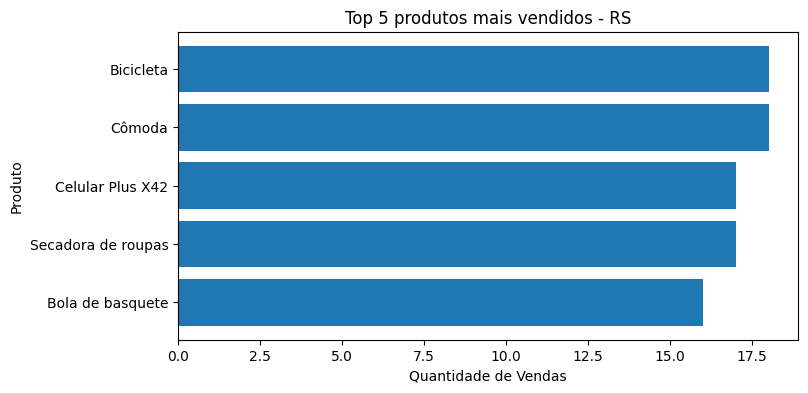

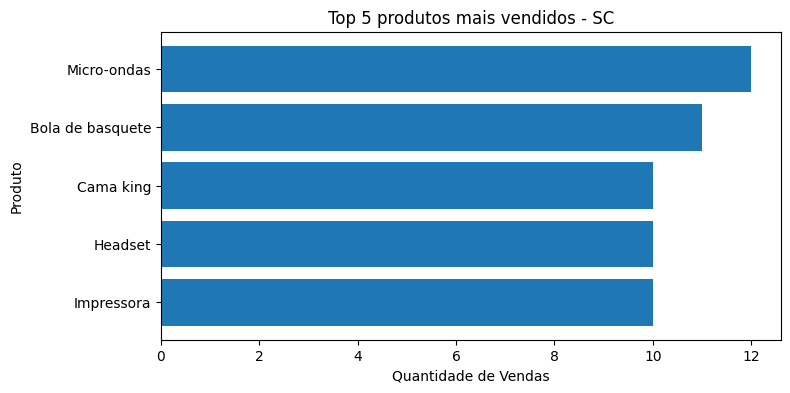

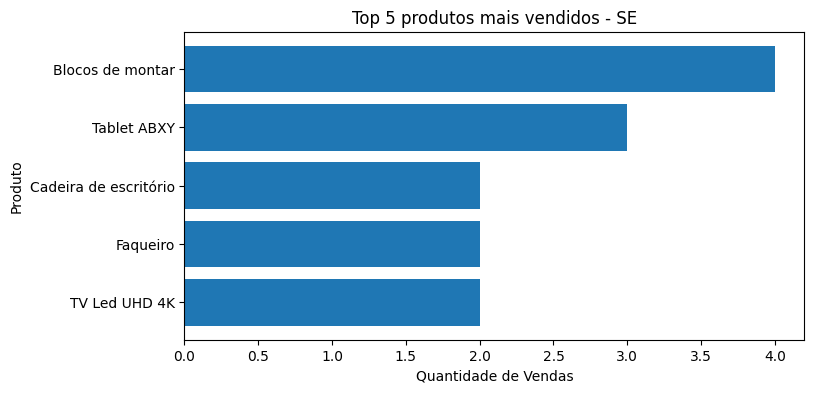

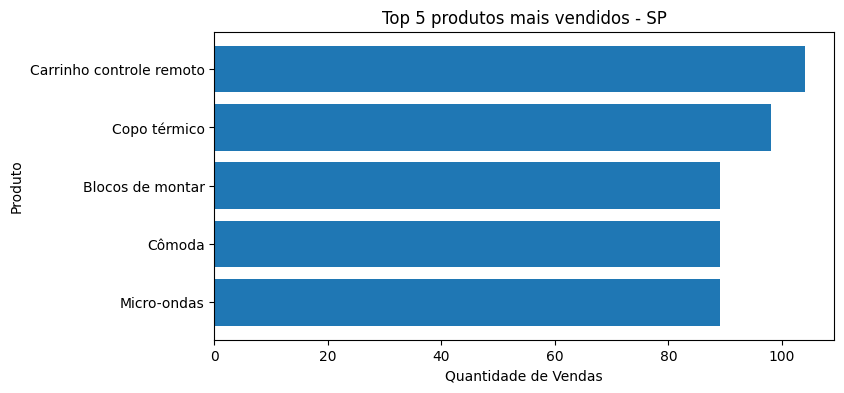

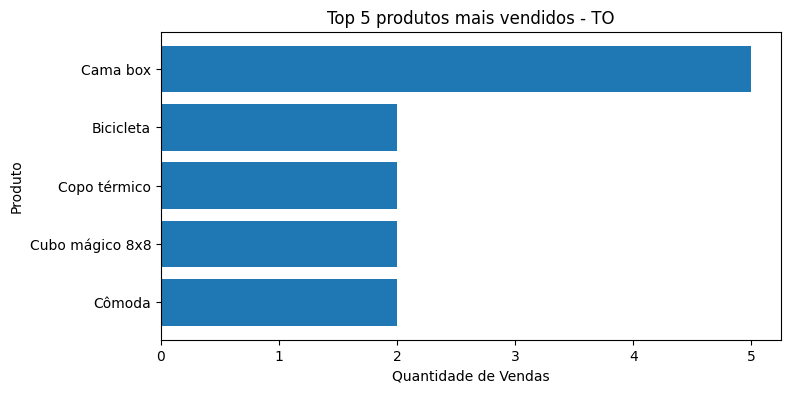

In [43]:
import matplotlib.pyplot as plt

# Top 5 produtos mais vendidos por loja
top5_produtos = (
    vendas_produto
    .sort_values(["Local da compra", "Quantidade de Vendas"], ascending=[True, False])
    .groupby("Local da compra")
    .head(5)
)

# Cria um gráfico separado para cada loja
for loja in top5_produtos["Local da compra"].unique():
    dados_loja = top5_produtos[top5_produtos["Local da compra"] == loja]
    plt.figure(figsize=(8,4))
    plt.barh(dados_loja["Produto"], dados_loja["Quantidade de Vendas"])
    plt.title(f"Top 5 produtos mais vendidos - {loja}")
    plt.xlabel("Quantidade de Vendas")
    plt.ylabel("Produto")
    plt.gca().invert_yaxis()  # Inverte para mostrar o maior no topo
    plt.show()


# 5. Frete Médio por Loja

In [44]:
# Calcula o custo médio de frete por loja
frete_medio_por_loja = (
    todas_lojas
    .groupby("Local da compra")["Frete"]
    .mean()
    .reset_index()
    .rename(columns={"Frete": "Custo Médio de Frete"})
)

# Arredonda o valor para 2 casas decimais
frete_medio_por_loja["Custo Médio de Frete"] = frete_medio_por_loja["Custo Médio de Frete"].round(2)

# Ordena do maior para o menor custo médio
frete_medio_por_loja = frete_medio_por_loja.sort_values("Custo Médio de Frete", ascending=False)

print(frete_medio_por_loja)

   Local da compra  Custo Médio de Frete
21              RR                113.67
0               AC                 49.36
20              RO                 46.35
19              RN                 40.09
8               GO                 38.13
16              PI                 36.95
22              RS                 36.58
15              PE                 35.72
9               MA                 35.13
17              PR                 34.57
18              RJ                 33.94
14              PB                 33.91
11              MS                 33.69
26              TO                 33.46
10              MG                 33.46
1               AL                 33.26
7               ES                 33.20
25              SP                 32.71
12              MT                 32.69
13              PA                 30.63
24              SE                 30.49
4               BA                 30.26
6               DF                 30.19
23              

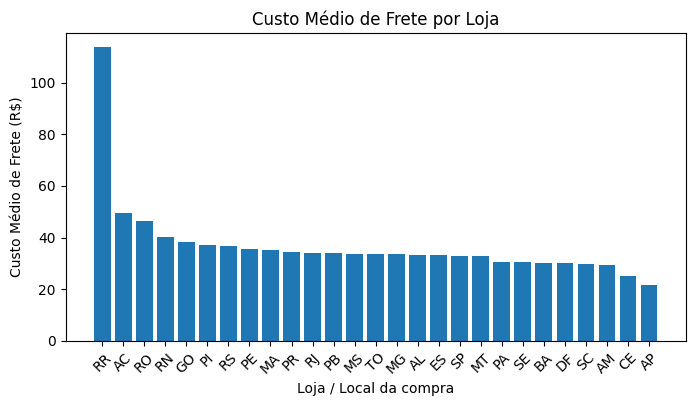

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(frete_medio_por_loja["Local da compra"], frete_medio_por_loja["Custo Médio de Frete"])
plt.title("Custo Médio de Frete por Loja")
plt.xlabel("Loja / Local da compra")
plt.ylabel("Custo Médio de Frete (R$)")
plt.xticks(rotation=45)
plt.show()

In [46]:
# 1️⃣ Recalcula o faturamento total por loja (caso a variável não esteja mais no ambiente)
faturamento_por_loja = (
    todas_lojas
    .groupby("Local da compra")["Preço"]
    .sum()
    .reset_index()
    .rename(columns={"Preço": "Faturamento Total"})
)

# 2️⃣ Calcula o frete médio por loja
frete_medio_por_loja = (
    todas_lojas
    .groupby("Local da compra")["Frete"]
    .mean()
    .reset_index()
    .rename(columns={"Frete": "Custo Médio de Frete"})
)
frete_medio_por_loja["Custo Médio de Frete"] = frete_medio_por_loja["Custo Médio de Frete"].round(2)

# 3️⃣ Junta as duas tabelas com base no nome da loja
resumo_lojas = pd.merge(faturamento_por_loja, frete_medio_por_loja, on="Local da compra")

# 4️⃣ Ordena pelo maior faturamento
resumo_lojas = resumo_lojas.sort_values("Faturamento Total", ascending=False)

print(resumo_lojas)


   Local da compra  Faturamento Total  Custo Médio de Frete
25              SP         2419806.94                 32.71
18              RJ          771412.90                 33.94
10              MG          690814.92                 33.46
22              RS          367611.78                 36.58
17              PR          307757.16                 34.57
23              SC          194401.69                 29.84
4               BA          176053.80                 30.26
6               DF          136502.84                 30.19
8               GO          132492.61                 38.13
15              PE          120764.28                 35.72
7               ES          106834.71                 33.20
5               CE           70799.98                 25.00
11              MS           51329.96                 33.69
12              MT           48582.84                 32.69
13              PA           47176.43                 30.63
9               MA           40949.76   

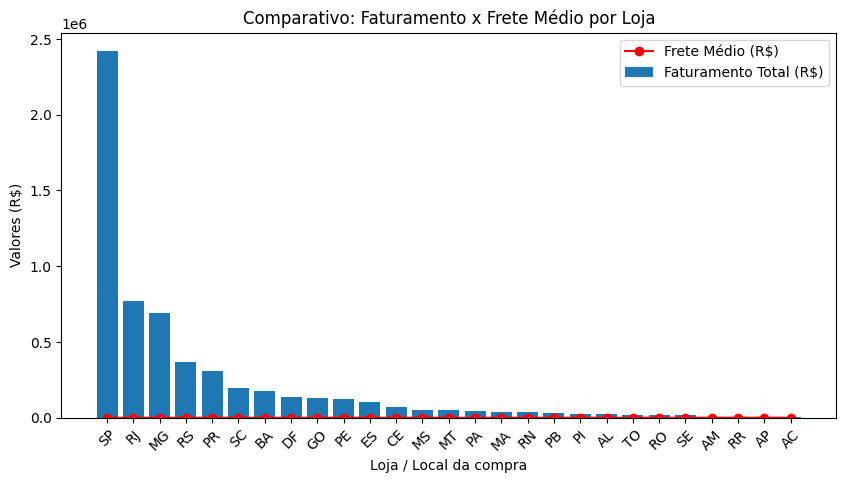

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(resumo_lojas["Local da compra"], resumo_lojas["Faturamento Total"], label="Faturamento Total (R$)")
plt.plot(resumo_lojas["Local da compra"], resumo_lojas["Custo Médio de Frete"], color="red", marker="o", label="Frete Médio (R$)")
plt.title("Comparativo: Faturamento x Frete Médio por Loja")
plt.xlabel("Loja / Local da compra")
plt.ylabel("Valores (R$)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [48]:
todas_lojas["Valor Total"] = todas_lojas["Preço"] + todas_lojas["Frete"]

faturamento_por_loja = todas_lojas.groupby("Local da compra")["Valor Total"].sum().reset_index()
faturamento_por_loja = faturamento_por_loja.sort_values("Valor Total", ascending=False)

print(faturamento_por_loja)


   Local da compra   Valor Total
25              SP  2.548779e+06
18              RJ  8.125429e+05
10              MG  7.276883e+05
22              RS  3.871468e+05
17              PR  3.241085e+05
23              SC  2.047259e+05
4               BA  1.854335e+05
6               DF  1.438078e+05
8               GO  1.395848e+05
15              PE  1.272298e+05
7               ES  1.125119e+05
5               CE  7.457535e+04
11              MS  5.409288e+04
12              MT  5.119817e+04
13              PA  4.965774e+04
9               MA  4.312779e+04
19              RN  3.777058e+04
14              PB  3.106626e+04
16              PI  2.934201e+04
1               AL  2.718725e+04
26              TO  1.874888e+04
20              RO  1.730412e+04
24              SE  1.717727e+04
2               AM  8.259759e+03
21              RR  4.425136e+03
3               AP  3.976256e+03
0               AC  2.952524e+03


## Graficos

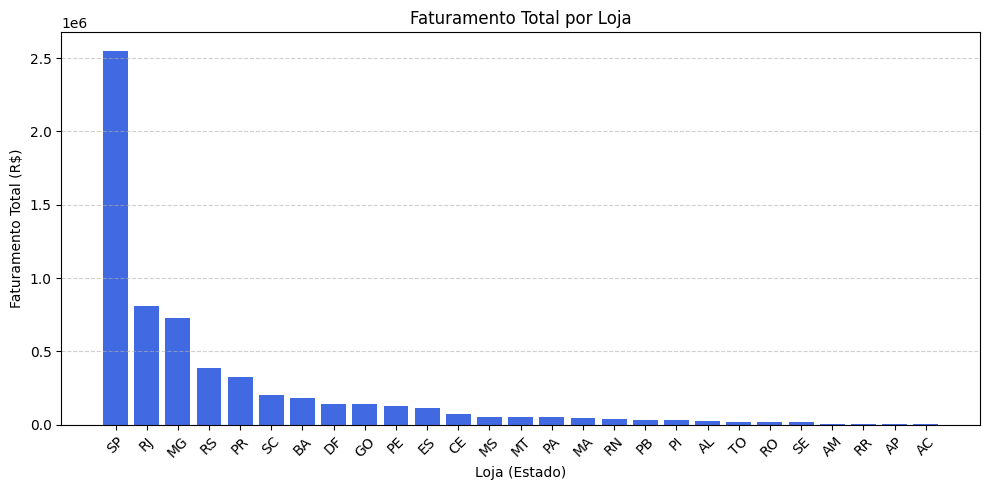

In [49]:
import matplotlib.pyplot as plt

# Gráfico de faturamento por loja
plt.figure(figsize=(10,5))
plt.bar(faturamento_por_loja["Local da compra"], faturamento_por_loja["Valor Total"], color='royalblue')
plt.title("Faturamento Total por Loja")
plt.xlabel("Loja (Estado)")
plt.ylabel("Faturamento Total (R$)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


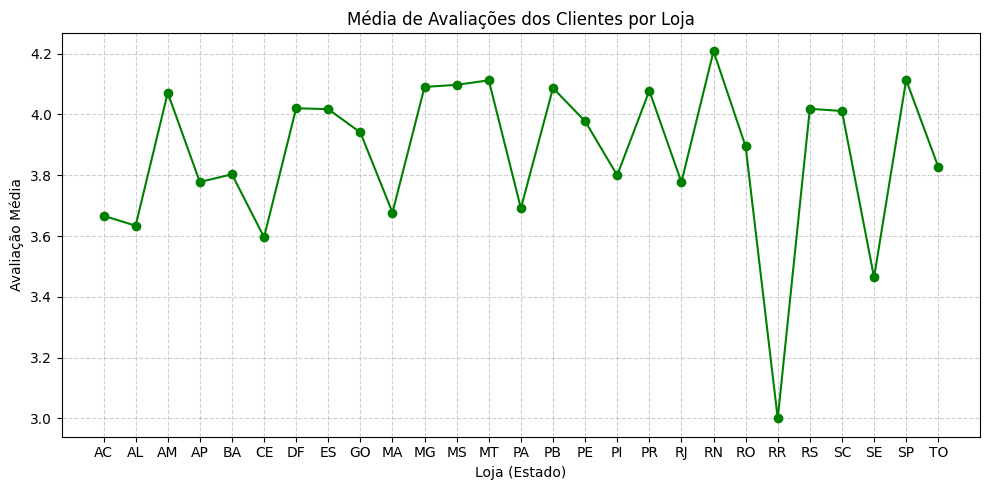

In [50]:
avaliacao_media = todas_lojas.groupby("Local da compra")["Avaliação da compra"].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(avaliacao_media["Local da compra"], avaliacao_media["Avaliação da compra"], marker='o', color='green')
plt.title("Média de Avaliações dos Clientes por Loja")
plt.xlabel("Loja (Estado)")
plt.ylabel("Avaliação Média")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


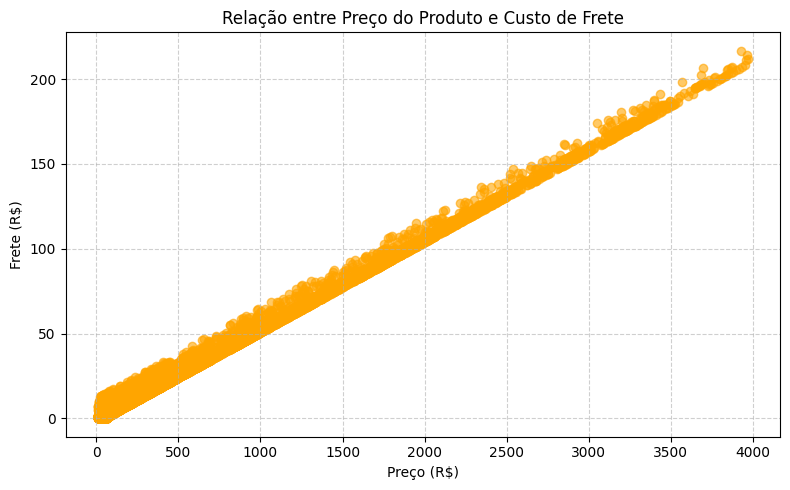

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(todas_lojas["Preço"], todas_lojas["Frete"], alpha=0.6, color='orange')
plt.title("Relação entre Preço do Produto e Custo de Frete")
plt.xlabel("Preço (R$)")
plt.ylabel("Frete (R$)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# 📊 Relatório de Desempenho das Lojas — Alura Store Brasil

## 👤 Cliente: Sr. João

**Objetivo:** Identificar qual loja apresenta melhor desempenho para investir e qual deve ser vendida.

---

## 🏆 Loja com Melhor Desempenho
- **Loja:** São Paulo (SP)  
- **Faturamento Total:** R$ 2.548.779,00  

✅ A loja de São Paulo possui o maior faturamento da rede, com excelente volume de vendas e forte potencial de crescimento.  
➡️ **Recomendação:** Investir na expansão e fortalecimento dessa unidade.

---

## 🔻 Loja com Pior Desempenho
- **Loja:** Acre (AC)  
- **Faturamento Total:** R$ 2.952,52  

⚠️ A loja do Acre apresenta o menor faturamento entre todas as filiais, indicando baixo retorno financeiro e pouca atividade comercial.  
➡️ **Recomendação:** Considerar a venda ou encerramento dessa unidade.

---

## 💡 Conclusão
Com base nos resultados financeiros, recomenda-se **investir na loja de São Paulo (SP)** e **vender a loja do Acre (AC)**, redirecionando os recursos para regiões com maior potencial de lucro.

---

📅 *Relatório gerado com base em análises realizadas no Google Colab utilizando Python (pandas).*